# 微信聊天记录制作词云
## ——相恋 1000days 纪念日

### 词云制作

+ **步骤0**：数据是所有步骤的起点——首先需要导出微信中与指定联系人的聊天记录，这是一串及其复杂的操作（不过如果你有一部root过的手机就会变得简单很多哈哈），具体操作可以google相关帖子。在微信聊天记录导出后，会有一个html文件，用IE浏览器打开网页文件，将网页另存为txt文件（默认utf-8编码就不要改动了）。至此，就得到了词云制作的原材料啦。
+ **步骤1**：在python中读取文本文件，利用正则表达从读取的内容中提取中文字符（数据清洗：剔除掉txt文件中大量无关的英文字符），注意中文的编码范围是：\u4e00到\u9fa5
+ **步骤2**：通过正则表达搜索返回中文文本的list后，使用reduce函数重新将所有内容拼接在一起，使用jieba进行分词
+ **步骤3**：去掉一些常见停用词以及其他无意义的词语，比如：的，吗，呢，还有聊天记录里对话的id名、图片语音提示等等
+ **步骤4**：在文本内容清洗过后，进行数据统计，将样本以词语进行分组，统计每一个词语出现的频次，生成词语与频次的字典
+ **步骤5**：作图，选定一张好看的图片（这里选了红色的心形）勾勒词云形状，利用wordcloud库对词云进行设定并以上述字典中频次决定词语字体大小
+ **步骤6**：展示图片，看看都是些什么话题，刻画了什么样的规律。总之，好好欣赏吧。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import jieba    #分词包
from wordcloud import WordCloud,ImageColorGenerator #词云包与色彩生成器

In [2]:
# 在编码为utf-8的文本文件中提取中文，返回中文字符串list

import re

def chinese(file):
    with open(file, 'r', encoding = 'utf-8') as f:
        lines = f.read()
        zh = re.findall(r'[\u4e00-\u9fa5]+', lines)
        return zh

# 将字符串的list拼接在一起，函数返回拼接后的字符串

from functools import reduce

def joint(list):
    j = reduce(lambda x, y: x+y, list)
    return j

In [3]:
zh = chinese('D:\github\TEMP\TC.txt')
# print(type(zh))  
# print(zh)
word_all = joint(zh)

# 使用jieba进行分词，jieba下lcut返回列表，再将list将其转化为dataframe方便筛选
word_ls = jieba.lcut(word_all)
# print(word_ls)
words_df = pd.DataFrame({'word_ls':word_ls})
# words_df.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\CHENJI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.666 seconds.
Prefix dict has been built succesfully.


In [4]:
# 剔除停用词的函数，这里停用词存放在一个txt文档，希望在dataframe中剔除这些词

Stopwords = pd.read_csv('D:\github\TEMP\stopword.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding="gb18030")
words_df_new = words_df[ ~ words_df.word_ls.isin(Stopwords.stopword)]
# words_df_new.head(18)

In [6]:
# 统计结果

words_stat= words_df_new.groupby('word_ls')['word_ls'].agg({'count':np.size})
words_stat_sort = words_stat.reset_index().sort_values(by='count', ascending=False)
# words_stat_sort

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


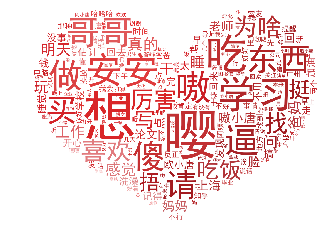

In [11]:
# 作图

%matplotlib inline

words_dict = words_stat_sort.set_index('word_ls').to_dict()
bg_img = imageio.imread(r'D:\github\TEMP\temp\heart.jpg')
bg_img_Colors = ImageColorGenerator(bg_img)

wordcloud_set = WordCloud(background_color='white', mask=bg_img, font_path='simhei.ttf')
wordcloud_fit = wordcloud_set.fit_words(words_dict['count'])
plt.axis("off")
plt.imshow(wordcloud_fit.recolor(color_func=bg_img_Colors))
plt.savefig(r"D:\github\TEMP\temp\love.jpg")
plt.show()
